# Logistic Regression

In this notebook I will learn:
- how to extract features for logistic regression given some text
- Implement logistic regression from scratch
- Apply logistic regression on a natural language processing task
- Test using your logistic regression
- Perform error analysis

## Import functions and data

In [48]:
# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Local imports
import utils


### Helper functions in the utils.py:
- process_text: cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
- build_freqs: this counts how often a word in the 'corpus' (the entire set of texts) was associated with a  label '1' or a  label '0', then builds the 'freqs' dictionary, where each key is the (word,label) tuple, and the value is the count of its frequency within the corpus of texts.
- extract_features: extracting infromation from freqs dictionary for every word in a text and storing them into a matrix for further inference.
- predict_text: given text, freqs dictionary and learnt theta outputs sigmoid prediction.
- test_logistic_regression: Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model.



Functions below handle data loading and splitting into a balanced dataset.

In [49]:
# Constants and configurations
TRAIN_SIZE = 6000
RANDOM_SEED = 42  # Add randomization for reproducibility

# Data loading with error handling
def load_data(ham_path='hammas_text', idf_path='idf_text'):
    try:
        hammas_text = pd.read_pickle(ham_path)
        idf_text = pd.read_pickle(idf_path)
        return hammas_text.tolist(), idf_text.tolist()
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None

# Split data with clear function
def train_test_split(ham_data, idf_data, train_size):
    
    #choosing shortest of lists to balance the other one for the training
    shortest_list = len(min(ham_data, idf_data, key=len))
    
    train_ham = ham_data[:train_size]
    test_ham = ham_data[train_size:shortest_list]
    train_idf = idf_data[:train_size]
    test_idf = idf_data[train_size:shortest_list]
    return train_ham, test_ham, train_idf, test_idf


In [50]:
#Loading input data
ham_data, idf_data = load_data()
train_ham, test_ham, train_idf, test_idf = train_test_split(ham_data, idf_data, TRAIN_SIZE)
train_x = train_ham + train_idf
test_x = test_ham + test_idf

# combine positive and negative labels
train_y = np.append(np.ones((len(train_ham), 1)), np.zeros((len(train_idf), 1)), axis=0)
test_y = np.append(np.ones((len(test_ham), 1)), np.zeros((len(test_idf), 1)), axis=0)

# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))


train_y.shape = (12000, 1)
test_y.shape = (4452, 1)
type(freqs) = <class 'dict'>
len(freqs) = 22093


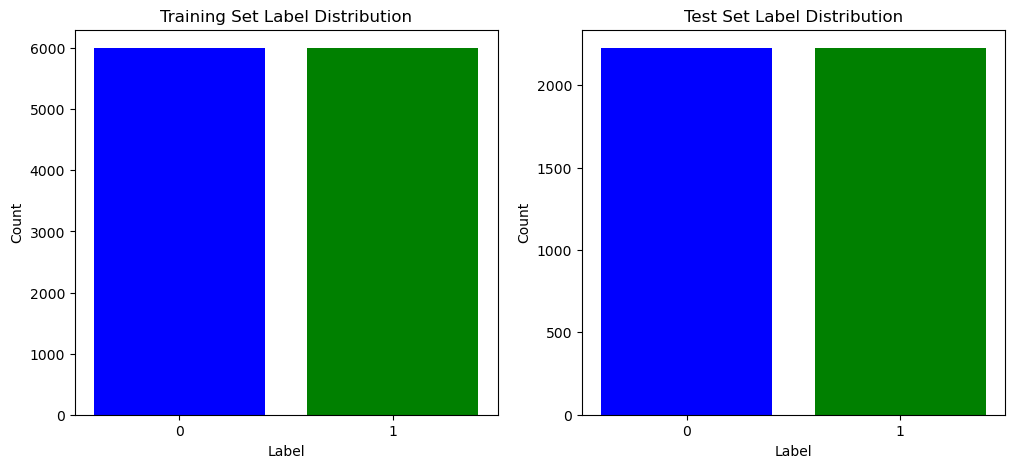

In [51]:
# create frequency dictionary
freqs = utils.build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))


# collect 'x' features and stack them into 'X' matrix
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= utils.extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

#plot the labels the distribution
def plot_label_distribution(train_y, test_y):
    labels, counts_train = np.unique(train_y, return_counts=True)
    labels, counts_test = np.unique(test_y, return_counts=True)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].bar(labels, counts_train, color=['blue', 'green'])
    ax[0].set_title('Training Set Label Distribution')
    ax[0].set_xticks(labels)
    ax[0].set_xlabel('Label')
    ax[0].set_ylabel('Count')
    
    ax[1].bar(labels, counts_test, color=['blue', 'green'])
    ax[1].set_title('Test Set Label Distribution')
    ax[1].set_xticks(labels)
    ax[1].set_xlabel('Label')
    ax[1].set_ylabel('Count')
    
    plt.show()

plot_label_distribution(train_y, test_y)

The cost after training is 0.08746491.
The resulting vector of weights is [1e-08, 0.00019015, -0.00012442]

Logistic regression model's accuracy = 0.99236


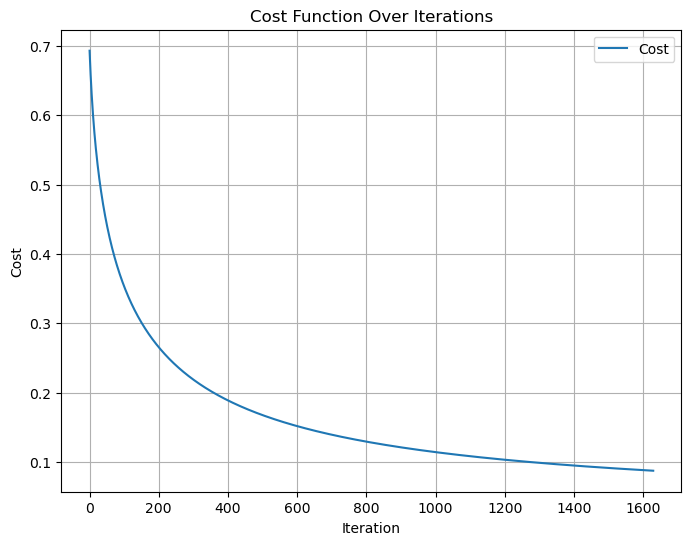

In [52]:
# Apply gradient descent
J, theta, J_history = utils.gradientDescent(X, Y, np.zeros((3, 1)), 1e-10, 1630)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

#Had learnt that [0.1572,  0.2531, -0.1533] parameters on previous iterations give 0.9915 accuracy

tmp_accuracy = utils.test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.5f}")

def plot_cost_over_iterations(costs):
    plt.figure(figsize=(8, 6))
    plt.plot(costs, label='Cost')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have a list of costs from your gradient descent
plot_cost_over_iterations(J_history)

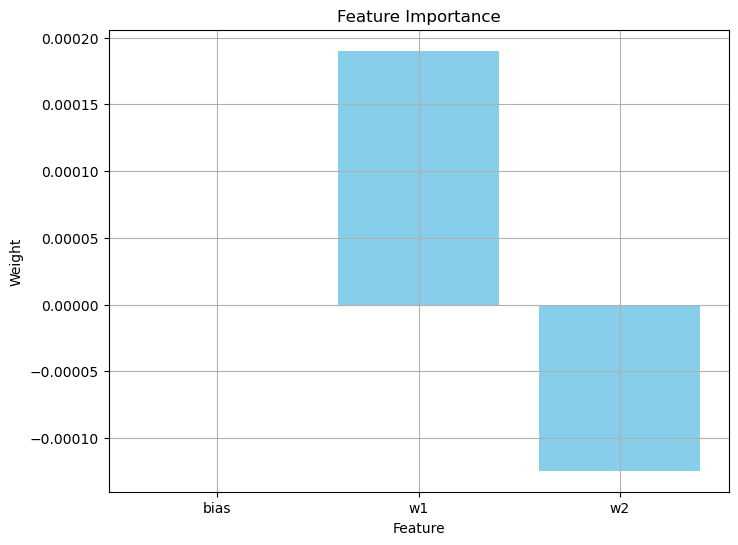

In [53]:
def plot_feature_importance(theta, feature_names):
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, theta.squeeze(), color='skyblue')
    plt.xlabel('Feature')
    plt.ylabel('Weight')
    plt.title('Feature Importance')
    plt.grid(True)
    plt.show()

# Assuming theta is your learned weights and feature_names is a list of feature names
feature_names = ['bias', 'w1', 'w2']
plot_feature_importance(theta, feature_names)

/var/folders/hl/d5jnxqdx1tlglj_yhvqpcnsh0000gn/T/ipykernel_46270/4116947817.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = np.array([int(utils.predict_text(x, freqs, theta) > 0.5) for x in test_x])


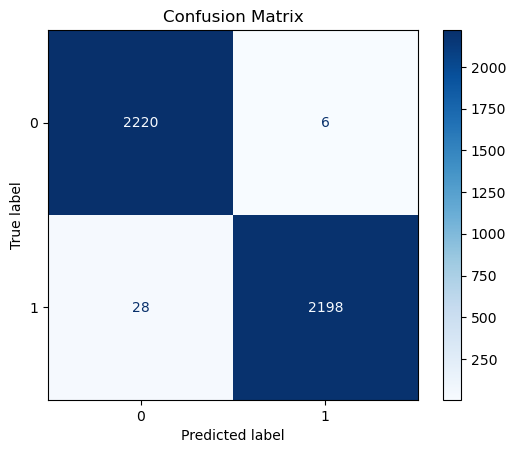

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Convert test_y to integers if they are not already
test_y = test_y.astype(int)

#Plotting confusion matrix(false positives and false negative counts)
y_pred = np.array([int(utils.predict_text(x, freqs, theta) > 0.5) for x in test_x])
plot_confusion_matrix(test_y, y_pred)



In [55]:
#Had learnt those parameters on previous iterations

theta = [0.1572,  0.2531, -0.1533]

### Try it out youself

In a **cell** below you can write or paste any text and see what the Regression model will classify it as.

In [56]:
for text in ['''Popular Front for the Liberation of Palestine:
—
Tulkarem continues to display the most splendid epics of heroism and sacrifice. 

The Popular Front mourns the martyrs of Tulkarem (https://t.me/PalestineResist/47112) and affirms that the resistance will remain a thorn in the throat of the criminal zionist enemy. 

The Popular Front for the Liberation of Palestine mourns a new group of heroic resistance fighters who were martyred yesterday evening, Tuesday, in a cowardly zionist bombing carried out by a drone, (https://t.me/PalestineResist/47090) targeting them in the middle of the brave Nour Shams camp east of the occupied city of Tulkarem.

This new zionist crime adds to the record of brutal crimes committed by the zionist entity against our steadfast people.''']:
  print( '%s -> %f' % (text, utils.predict_text(text, freqs, theta)))

Popular Front for the Liberation of Palestine:
—
Tulkarem continues to display the most splendid epics of heroism and sacrifice. 

The Popular Front mourns the martyrs of Tulkarem (https://t.me/PalestineResist/47112) and affirms that the resistance will remain a thorn in the throat of the criminal zionist enemy. 

The Popular Front for the Liberation of Palestine mourns a new group of heroic resistance fighters who were martyred yesterday evening, Tuesday, in a cowardly zionist bombing carried out by a drone, (https://t.me/PalestineResist/47090) targeting them in the middle of the brave Nour Shams camp east of the occupied city of Tulkarem.

This new zionist crime adds to the record of brutal crimes committed by the zionist entity against our steadfast people. -> 1.000000


/var/folders/hl/d5jnxqdx1tlglj_yhvqpcnsh0000gn/T/ipykernel_46270/1311148967.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (text, utils.predict_text(text, freqs, theta)))


In [57]:
counter = 0
m = len(test_x)
for x, y in zip(test_x, test_y):
    y_hat = utils.predict_text(x, freqs, theta)
    # Extract scalar value from the numpy array
    y_hat_scalar = y_hat.item() if hasattr(y_hat, "item") else float(y_hat)
    
    prediction = int(y_hat_scalar > 0.5)
    
    if np.abs(y - prediction) > 0:
        counter += 1
        processed_text = ' '.join(utils.process_text(x))
        # Convert to ASCII and decode into a string
        processed_text = processed_text.encode('ascii', 'ignore').decode('ascii')
        
        # Define ANSI color codes
        GREEN = "\033[32m"
        BLUE = "\033[34m"
        RESET = "\033[0m"
        print(counter, 'out of', m)
        print("--------------------------------------------------")
        print(GREEN,"Original Text:    ",RESET, x)
        print("--------------------------------------------------")
        print(BLUE,"Processed Text:   ",RESET, processed_text)
        print("--------------------------------------------------")
        print("True label - ", "%d\t%s%0.8f" % (y, 'Predicted Label - ', y_hat))
        print("--------------------------------------------------\n")

/var/folders/hl/d5jnxqdx1tlglj_yhvqpcnsh0000gn/T/ipykernel_46270/2522137890.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("True label - ", "%d\t%s%0.8f" % (y, 'Predicted Label - ', y_hat))
/Users/timurburhanov/Projects/GitHub/chat_analysis/utils.py:106: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))


1 out of 4452
--------------------------------------------------
 Original Text:      🚨 BREAKING: After over an hour of fragile silence, missile sirens ring in the settlement of “Nir Am.” Preliminary reports indicate that missiles were launched from Gaza.
--------------------------------------------------
 Processed Text:      break after hour fragil silenc missil siren ring settlement  nir am.  preliminari report indic missil launch gaza
--------------------------------------------------
True label -  1	Predicted Label - 0.00000000
--------------------------------------------------

2 out of 4452
--------------------------------------------------
 Original Text:      Five injuries have been reported by the ministry of health in Gaza following the IOF bombing of the Strip yesterday.
--------------------------------------------------
 Processed Text:     five injuri report ministri health gaza follow iof bomb strip yesterday
--------------------------------------------------
True label 

19 out of 4452
--------------------------------------------------
 Original Text:      customemoji⏺stickers/AnimatedSticker.tgs🎥 RNN is now on TikTok! Support and follow us here:link
--------------------------------------------------
 Processed Text:     customemojistickers/animatedsticker.tgs rnn tiktok support follow us link
--------------------------------------------------
True label -  1	Predicted Label - 0.00000000
--------------------------------------------------

20 out of 4452
--------------------------------------------------
 Original Text:      IDF: The Chief of the General Staff on the Northern Border: "We are in a very high state of readiness in the North, and are currently focusing on fighting Hamas"Today (Wednesday), the Chief of the General Staff held a situational assessment at the northern border with the Commanding Officer of the Northern Command, MG Ori Gordin, and the Commanding Officer of the 210th Division, BG Zion Ratzon, along with the brigade and battalion c

24 out of 4452
--------------------------------------------------
 Original Text:      IDF: Footage published by COGAT: Many Gazans evacuating through the humanitarian corridor in Khan Yunis, chanting  "The people want to overthrow Hamas"Today (Saturday, the Coordinator of Government Activities in the Territories, MG Rasan Aliyan, published footage from the heart of the Gaza Strip, on the unit's Arabic Facebook page, "Almonsk". While many Gazans were evacuating through the humanitarian corridor in Khan Yunis, yesterday, they chanted: "The people want to overthrow Hamas."The footage is from the humanitarian corridor that was opened and secured in recent days west of Khan Yunis and allows Gazans to safely move to the AlMawasi humanitarian area. The evacuation route was opened by the IDF to allow the safe passage of civilians, while the IDF continues to fight Hamas.In the words of the Coordinator of Government Activities in the Territories, MG Rasan Aliyan: "In recent days, we have been s

28 out of 4452
--------------------------------------------------
 Original Text:      have yet to reach and also in those we have already operated. We have plans, and we will choose the right time to carry them out and, of course, the right way to do so.We will restore and rebuild the communities and kibbutzim in the area. Our mission is to enable residents – in the north and the south – to return home safely. In the last few months, I have seen the fields being plowed and sown. We will do everything so that those who sowed with tears will reap in as much joy as much as possible.We are preparing for the fighting to continue for a long time. Replenishing the forces and releasing some of the reserve forces – we know we will need them again.I know of soldiers in the regular service who have only returned to their homes once or twice since the war began. The rate at which soldiers return home is not at the discretion of the commanders, but rather are based on operational decisions derived

33 out of 4452
--------------------------------------------------
 Original Text:      IDF: New UAV Squadron Opened in the Israeli Air ForceLast night (Sunday), a new UAV Squadron was opened at the Palmachim Air Force base. The 147th "Battering Ram" Squadron will operate the "Star" unmanned aerial vehicle. The squadron was opened as part of the expansion of the "Star" UAV forces in combat and changes in the organization of the UAV Array. The UAVs carry out various strikes and intelligencegathering missions in the south, north, and Judea and Samaria at all hours of the day.*Commanding Officer of the Israeli Air Force, Maj. Gen. Tomer Bar*: "This is a time of war, a historic time. We are opening the 147th Squadron, which is a tremendous addition to the force. In this just war, the entire UAV Array demonstrates its operational competence and extremely high operational effectiveness. Thousands of Hamas operatives have been killed, a range of intelligence gathering missions, 24/7 availabili

38 out of 4452
--------------------------------------------------
 Original Text:      IDF: Joint Exercise of the Israeli Air Force and the Hellenic Airforce: Refueling Fighter Jets in Greek SkiesToday (Tuesday), the Israeli Air Force and the Hellenic Air Force conducted a joint exercise in Greek skies. As part of the exercise, Boeing 707 refueling aircraft of the 120th Squadron (the Israeli Air Force refueling squadron) participated in the flights and refueled dozens of airborne Hellenic Air Force fighter jets. This exercise was held in the framework of a planned training program and as part of the regional cooperation between the two countries.The Israeli Air Force's refueling exercise with Greece occurs several times a year on a regular basis. The training simulates an operational flight and longrange refueling of fighter jets, as for several hours the fighter jets join and receive fuel to continue their missions.The main mission of the 120th Squadron is to conduct longrange flights

## Visualising our logistic regression



In [58]:
#selected 11 most common words from each at random

keys = ['arrest','entiti','tulkarem','settlement','resist','martyr','zionist','allah', '🚨', 'soldier',
         'hospit','fighter','tunnel','organ','lebanon','terrorist','hezbollah','infrastructur','rocket','israel','conduct']


# each element consist of a sublist with this pattern: [<word>, <ham_count>, <idf_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    ham = 0
    idf = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        ham = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        idf = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, ham, idf])


/Users/timurburhanov/miniconda3/envs/first_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


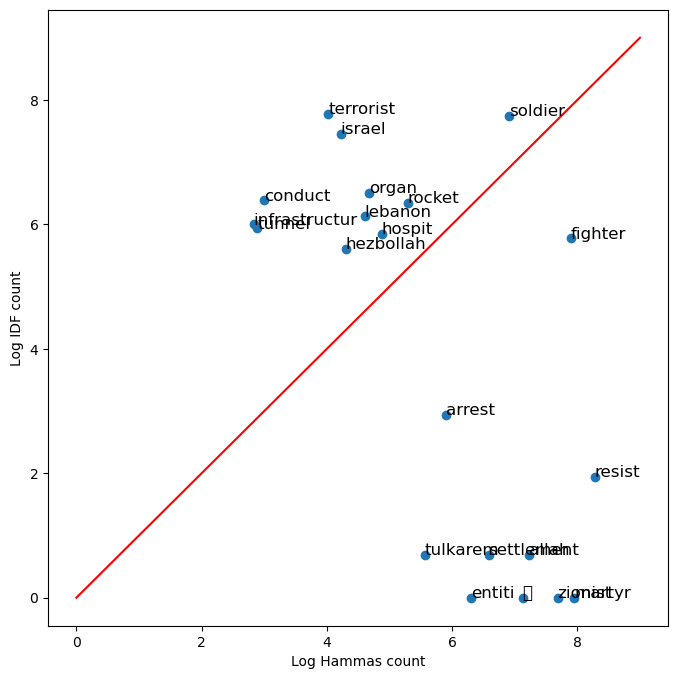

In [46]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Hammas count")
plt.ylabel("Log IDF count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()